In [130]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [131]:
data = pd.read_csv("bike_sharing_rental.csv")

In [132]:
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [133]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,365.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,182.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,365.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,547.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


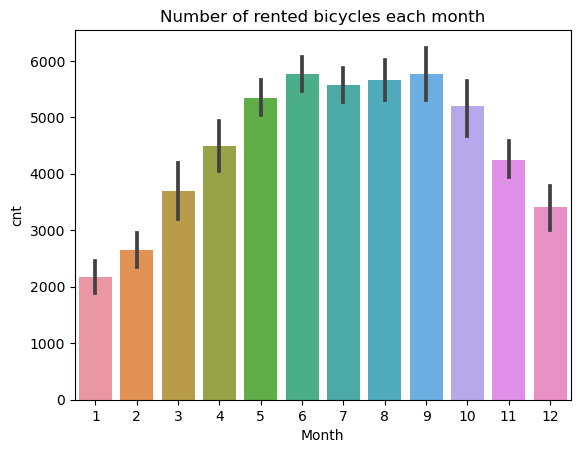

In [134]:
#number of rented bicycles each month
sn.barplot(x="mnth", y="cnt", data=data)
plt.xlabel('Month')
plt.title("Number of rented bicycles each month")
plt.show()

<AxesSubplot:xlabel='hum', ylabel='cnt'>

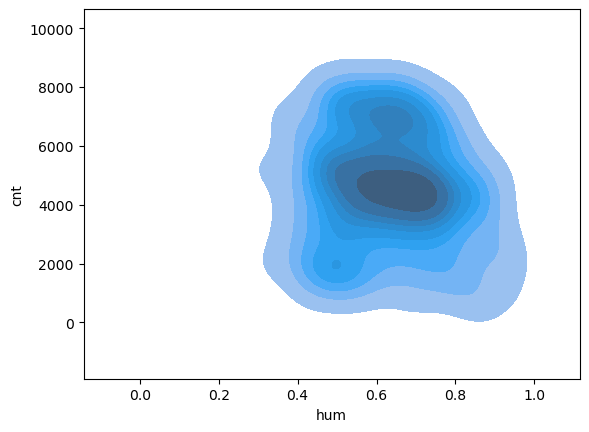

In [135]:
sn.kdeplot(x='hum', y='cnt', data=data, shade=True)

In [136]:
#the most rented bicycles by temprature
temp_count=(data.groupby('temp')['cnt'].sum())
print(f'in this temprature we hade the most rented bicycles {temp_count.idxmax()}')

in this temprature we hade the most rented bicycles 0.564167


In [137]:
y = data.pop("cnt")

In [138]:
del data['instant']

In [139]:
X = data

<AxesSubplot:ylabel='features'>

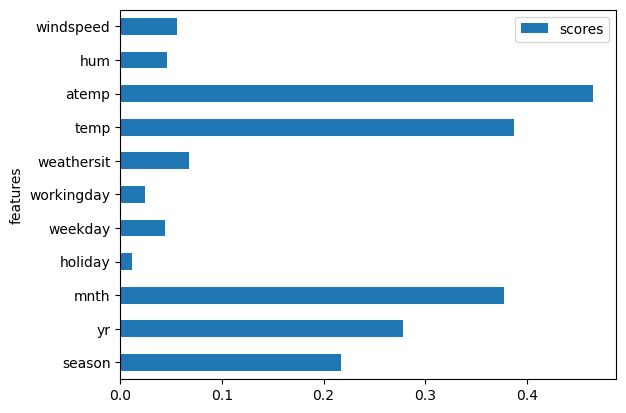

In [140]:
#mutual information
normalized_df = StandardScaler().fit_transform(X)
featured_scores = SelectKBest(score_func=mutual_info_regression, k='all').fit(normalized_df, y)
featured_scores_df = pd.DataFrame({"features":X.columns, "scores":featured_scores.scores_})
featured_scores_df.plot(x='features', y="scores", kind='barh')

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #spliting our data

In [142]:
#buildig our model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("model coefficienc: ", model.coef_)
print("model intercept: ", model.intercept_)

model coefficienc:  [  478.56534258  2075.92603339   -27.02460145  -556.71483679
    82.2303164     66.29441974  -585.5678409   2130.27383104
  3477.98040982 -1355.77341509 -2618.27546315]
model intercept:  1650.248181640875


In [143]:
#MSE of test and train data
y_pred_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print("train MSE: ", train_mse)
print("test MSE: ", test_mse)

train MSE:  780158.752513247
test MSE:  644265.0748105873
